C:\Users\Átila\AppData\Local\Temp\ipykernel_28880\3827738850.py:42: DeprecationWarning: Using factorial() with floats is deprecated
  a3b=math.factorial((a3a))


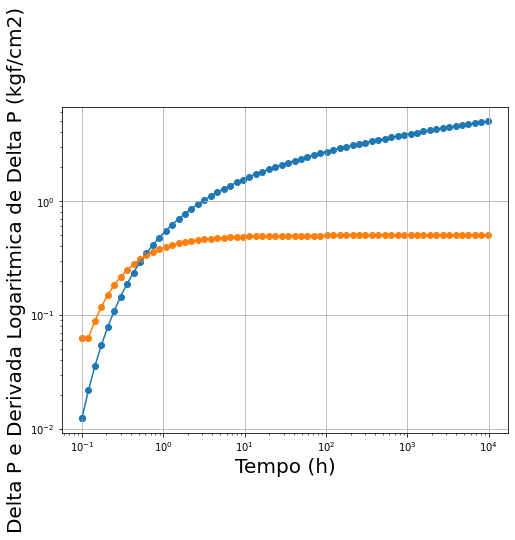

In [2]:
import numpy as np
import math 
import matplotlib.pyplot as plt
from numpy import log as ln
import scipy.special as sc

tDi = 0.1
tDf = 10000

n = 1
tD = np.zeros(65)
pD = np.zeros(65)
tD[0] = tDi

while tDi <= tDf:
    pD[n]=CALCULA_PD(tDi)
    tD[n]=tDi
    tDi=tDi*1.2
    n=n+1

PDLinha = np.zeros(65)
for np in range(2, n-1):
    PDLinha[np]=DerivLog(tD[np-1],pD[np-1],tD[np],pD[np],tD[np+1],pD[np+1])

PDLinha[1]=PDLinha[2]
PDLinha[0]=PDLinha[1]
PDLinha[n-1]=PDLinha[n-2]
pD[0] = pD[1]

fig = plt.figure(figsize=(8,6))
plt.scatter(tD,pD)
plt.plot(tD,pD)
plt.scatter(tD,PDLinha)
plt.plot(tD,PDLinha)
plt.grid()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Tempo (h)", fontsize=20)
plt.ylabel("Delta P e Derivada Logaritmica de Delta P (kgf/cm2)", fontsize=20)
plt.show()

In [1]:
# ====================================================
def DerivLog(x1,y1,xc,yc,x2,y2):
    d1=((y2-yc)/ln(x2/xc))*(ln(xc/x1)/ln(x2/x1))
    d2=((yc-y1)/ln(xc/x1))*(ln(x2/xc)/ln(x2/x1))
    return (d1+d2)

# ====================================================
#Solução da Linha-Fonte
# ====================================================
def FT_LINHAFONTE(u):
    return sc.kn(0,1*math.sqrt(u))/u
    #return sc.kn(0,1*math.sqrt(u))/(u**(3/2)*sc.kn(1,math.sqrt(u)))

def SolveAB(u):
    
# ====================================================
def minimo(i1, i2):
# ====================================================
    if i1 < i2:
        return i1
    else:
        return i2

# ====================================================
def CALCULA_PD(td):
#Rotina para inversão numérica de uma função no espaço de Laplace pelo algoritimo de Stehfest
# ===================================================
    NP_STEHFEST=12;
    n=NP_STEHFEST;

    v = np.zeros(65)
    for i in range(1, n+1):
        somat = 0
        inis = math.floor((i + 1)/2)
        fins = minimo(i,math.floor(n/2))
        a0=(-1)**(i+(n/2))
    #   disp([i,inis,fins])

        for k in range(inis, fins+1):
            a1=k**(1+(n/2))
            a2a=2*k
            a2b=math.factorial((a2a))
            a3a=((n/2)-k)
            a3b=math.factorial((a3a))
            a4a=math.factorial(k)
            a4b=a4a**2
            a5a=i-k
            a5b=math.factorial((a5a))
            a6a=((2*k)-i)
            a6b=math.factorial((a6a))
            somat=somat+(((a1*a2b)/(a3b*a4b*a5b*a6b)))
        v[i] = a0 * somat
    st = 0
    for m in range(1, NP_STEHFEST+1):
        u = m * ln(2.0) / td
    #=================================    
    # AQUI ENTRA A FUNÇÃO QUE EU QUERO    
    #=================================
        st = st + v[m] * FT_LINHAFONTE(u)
    return ln(2.0) * st / td